In [57]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
import seaborn as sns
from matplotlib.dates import DateFormatter
#Reading and cleaning confirmed cases dataset

df_c=pd.read_excel('Texas COVID-19 New Confirmed Cases by County.xlsx',header=2,skipfooter=2)
df_c.columns = [col.replace('New Cases', '') for col in df_c.columns]
df_c.set_index('County',inplace='True')
x=pd.to_datetime(df_c.columns)
df=pd.DataFrame(df_c.loc['Fort Bend'])
df[ '7day_avg' ]=df.rolling(window=7).mean()
y=list(df[ '7day_avg' ])#Calculating 7 day Average of confirmed case

#Reading and cleaning fatalities dataset

df_f=pd.read_excel('Texas COVID-19 Fatality Count Data by County.xlsx',header=2)
df_f.columns = [col.replace('Fatalities', '') for col in df_f.columns]
df_f.set_index('County Name',inplace='True')
df1=list(df_f.loc['FORT BEND'])
 

#The list contain cumulative data.changing to fatalities per day
lst=[]
lst=[df1[i+1]-df1[i] for i in range(len(df1)-1)]

df_lst=pd.DataFrame(lst)
df_lst[ '7day_avg' ]=df_lst.rolling(window=7).mean()
y1=list(df_lst[ '7day_avg' ])#Calculating 7 day average of fatalities

<IPython.core.display.Javascript object>


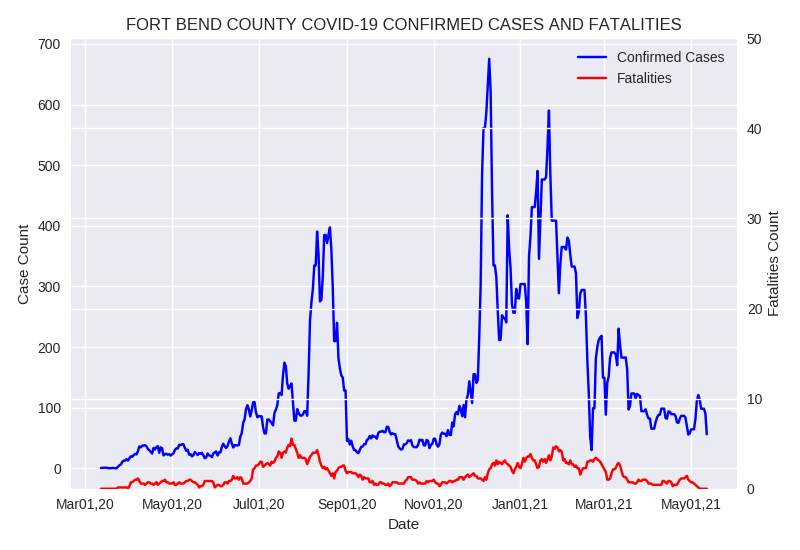

In [65]:
#Plotting Graph
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
ax1 = ax.twinx()
p1, = ax.plot(x, y, "b", label="Confirmed Cases")
p2, = ax1.plot(x,y1, "r", label="Fatalities")
ax1.set_ylim(0, 50)
formatter = DateFormatter('%b%d,%y')
x_axis = plt.gca().xaxis

plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
ax.set_xlabel("Date")
ax.set_ylabel("Case Count")
ax1.set_ylabel("Fatalities Count")
plt.title('FORT BEND COUNTY COVID-19 CONFIRMED CASES AND FATALITIES')
fig.tight_layout()
ax.legend(handles=[p1, p2])

